In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

data_path = 'data/data_academic_performance.csv'
data = pd.read_csv(data_path)
data = data.drop(columns=['COD_S11', 'Cod_SPro', 'PERCENTILE', '2ND_DECILE', 'QUARTILE', 'Unnamed: 9'])

In [2]:
data

,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,INTERNET,TV,...,ACADEMIC_PROGRAM,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,SEL,SEL_IHE
0,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,Yes,Yes,...,INDUSTRIAL ENGINEERING,71,93,71,93,79,181,180,2,2
1,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,Yes,Yes,...,INDUSTRIAL ENGINEERING,97,38,86,98,78,201,182,4,4
2,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,No,No,...,ELECTRONIC ENGINEERING,17,1,18,43,22,113,113,1,1
3,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,Yes,Yes,...,INDUSTRIAL ENGINEERING,65,35,76,80,48,137,157,2,2
4,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,Yes,Yes,...,INDUSTRIAL ENGINEERING,94,94,98,100,71,189,198,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,M,Ninguno,Complete Secundary,Other occupation,Auxiliary or Administrative,Stratum 2,It is not classified by the SISBEN,Six,Yes,Yes,...,MECHATRONICS ENGINEERING,88,71,86,87,65,142,176,2,2
12407,M,Complete professional education,Complete Secundary,Executive,Other occupation,Stratum 2,Level 2,Five,Yes,Yes,...,INDUSTRIAL ENGINEERING,46,39,44,11,0,127,107,4,2
12408,M,Complete technique or technology,Complete technique or technology,Retired,Home,Stratum 2,Level 2,Five,Yes,Yes,...,INDUSTRIAL ENGINEERING,98,88,90,81,87,192,188,2,2
12409,F,Complete professional education,Complete professional education,Independent professional,Small entrepreneur,Stratum 3,It is not classified by the SISBEN,Seven,Yes,Yes,...,CIVIL ENGINEERING,60,80,51,8,42,121,146,3,2


In [3]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le
missing_values = data.isnull().sum().sum()

data['G_SC_binned'] = pd.qcut(data['G_SC'], 4, labels=False)

X = data.drop(['G_SC', 'G_SC_binned'], axis=1)
y = data['G_SC_binned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
missing_values, X_train.shape, X_test.shape

(0, (9928, 38), (2483, 38))

In [4]:
X_train

,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,INTERNET,TV,...,UNIVERSITY,ACADEMIC_PROGRAM,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,SEL,SEL_IHE
8261,1,2,2,8,4,2,4,3,0,1,...,82,13,75,76,69,74,37,185,4,2
7518,1,9,1,8,1,3,2,10,1,1,...,61,5,98,74,86,77,65,166,2,2
5260,1,7,7,8,8,1,3,10,1,1,...,91,5,95,81,67,19,44,93,1,2
5187,0,1,1,10,10,3,2,2,1,1,...,74,1,76,68,54,83,31,177,3,2
10971,1,1,1,5,11,2,2,2,1,1,...,4,5,65,57,38,43,40,140,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,1,3,3,11,11,4,2,3,1,1,...,77,5,100,60,69,88,79,103,4,3
3264,1,0,0,0,4,2,2,12,1,1,...,115,5,100,90,90,75,20,149,3,2
9845,0,5,4,7,4,4,2,3,1,1,...,87,5,94,99,95,83,98,155,2,4
10799,0,1,1,9,11,4,2,3,1,1,...,119,5,83,70,88,82,85,108,4,2


In [5]:
y_train

8261     1
7518     2
5260     1
5187     1
10971    0
        ..
4859     3
3264     2
9845     3
10799    2
2732     2
Name: G_SC_binned, Length: 9928, dtype: int64

In [6]:
rf_model = RandomForestClassifier(n_estimators=100)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

Accuracy: 0.8699154248892469
F1 Score: 0.8707732362959091


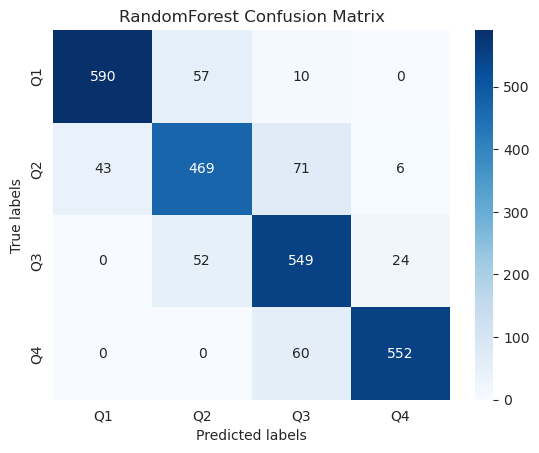

In [7]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=(['Q1', 'Q2', 'Q3', 'Q4']), yticklabels=(['Q1', 'Q2', 'Q3', 'Q4']))
plt.title('RandomForest Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.show()

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=4)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

accuracy_knn, f1_knn

(0.7684252919855014, 0.7687398071083463)

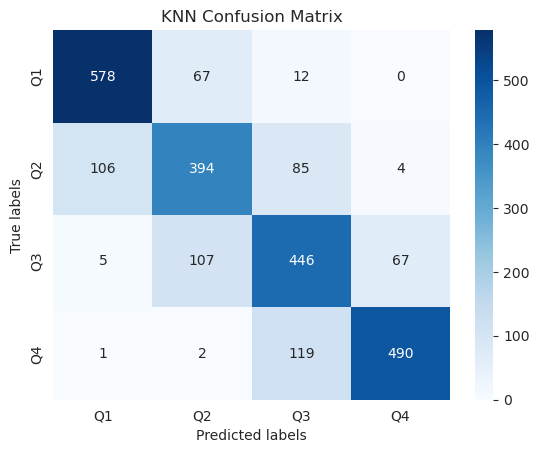

In [9]:
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=(['Q1', 'Q2', 'Q3', 'Q4']), yticklabels=(['Q1', 'Q2', 'Q3', 'Q4']))
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.show()

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
gml_boost = GradientBoostingClassifier(random_state=0)

gml_boost.fit(X_train, y_train)

y_pred_gml_boost = gml_boost.predict(X_test)
accuracy_gml_boost = accuracy_score(y_test, y_pred_gml_boost)
f1_gml_boost = f1_score(y_test, y_pred_gml_boost, average='weighted')
conf_matrix_gmlboost = confusion_matrix(y_test, y_pred_gml_boost)

accuracy_gml_boost, f1_gml_boost

(0.9299234796616995, 0.9303814199253471)

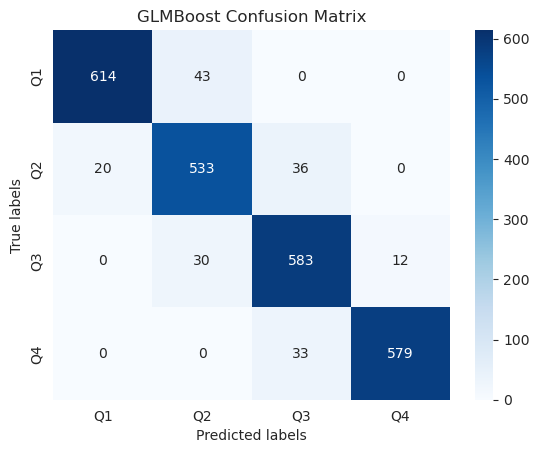

In [32]:
sns.heatmap(conf_matrix_gmlboost, annot=True, fmt="d", cmap="Blues", xticklabels=(['Q1', 'Q2', 'Q3', 'Q4']), yticklabels=(['Q1', 'Q2', 'Q3', 'Q4']))
plt.title('GLMBoost Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.show()

In [12]:
from sklearn.linear_model import LogisticRegressionCV

glmnet =  LogisticRegressionCV(cv=5, random_state=0, max_iter=10000)

glmnet.fit(X_train, y_train)

y_pred_glmnet = glmnet.predict(X_test)
accuracy_glmnet = accuracy_score(y_test, y_pred_glmnet)
f1_glmnet = f1_score(y_test, y_pred_glmnet, average='weighted')
conf_matrix_glmnet = confusion_matrix(y_test, y_pred_glmnet)

accuracy_glmnet, f1_glmnet

/home/meettilavat/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/meettilavat/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

(0.9178413209826822, 0.9179090151586687)

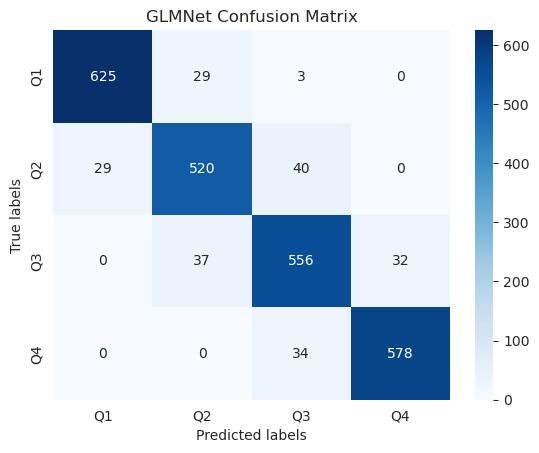

In [13]:
sns.heatmap(conf_matrix_glmnet, annot=True, fmt="d", cmap="Blues", xticklabels=(['Q1', 'Q2', 'Q3', 'Q4']), yticklabels=(['Q1', 'Q2', 'Q3', 'Q4']))
plt.title('GLMNet Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.show()

In [14]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=0)

svm_model.fit(X_train,y_train)

y_pred_svm_model = svm_model.predict(X_test)
accuracy_svm_model = accuracy_score(y_test, y_pred_svm_model)
f1_svm_model = f1_score(y_test, y_pred_svm_model, average='weighted')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm_model)

accuracy_svm_model, f1_svm_model

(0.7716472009665727, 0.7761782926806893)

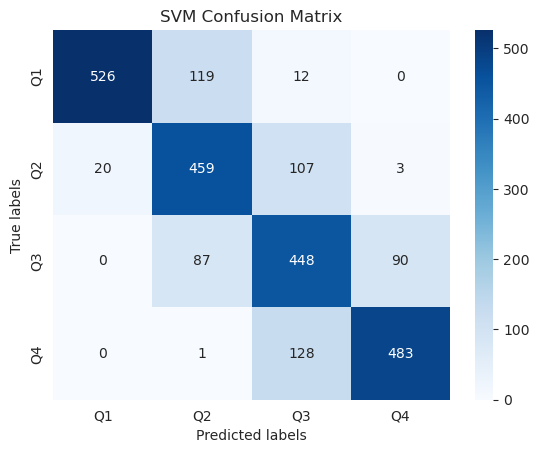

In [15]:
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=(['Q1', 'Q2', 'Q3', 'Q4']), yticklabels=(['Q1', 'Q2', 'Q3', 'Q4']))
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=0)

dt_model.fit(X_train, y_train)

y_pred_dt_model = dt_model.predict(X_test)
accuracy_dt_model = accuracy_score(y_test, y_pred_dt_model)
f1_dt_model = f1_score(y_test, y_pred_dt_model, average='weighted')
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt_model)

accuracy_dt_model, f1_dt_model

(0.8211840515505437, 0.8205205210695706)

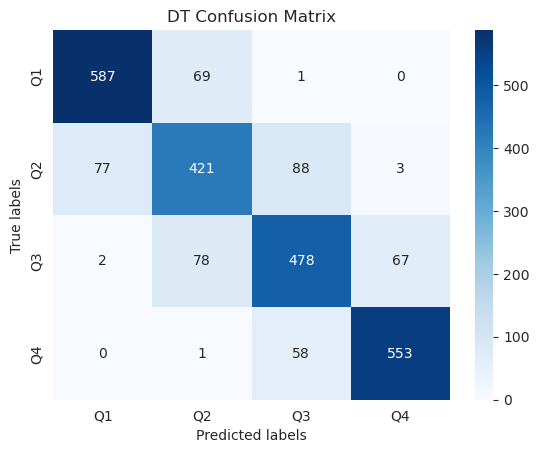

In [17]:
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=(['Q1', 'Q2', 'Q3', 'Q4']), yticklabels=(['Q1', 'Q2', 'Q3', 'Q4']))
plt.title('DT Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.show()

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define the 1D CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # Assuming 4 classes since 'G_SC_binned' is in 4 categories
])

# Reshape the data for the 1D CNN
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Create and compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(X_train_cnn, y_train, epochs=20, validation_data=(X_test_cnn, y_test))

# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy: {test_acc}")

2024-05-14 21:14:07.106829: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-14 21:14:07.322734: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 21:14:07.322768: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 21:14:07.362593: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-14 21:14:07.440311: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/20


:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-14 21:14:09.282726: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9502 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9
2024-05-14 21:14:10.056539: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-05-14 21:14:10.214493: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-14 21:14:10.461704: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-14 21:14:10.604237: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f0df4780990 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-14 21:14:10.604269: I external/local_xla/xla/se

311/311 [==============================] - 4s 6ms/step - loss: 4.6005 - accuracy: 0.4029 - val_loss: 2.9898 - val_accuracy: 0.4112
Epoch 2/20
311/311 [==============================] - 1s 4ms/step - loss: 1.4743 - accuracy: 0.5621 - val_loss: 1.0907 - val_accuracy: 0.5803
Epoch 3/20
311/311 [==============================] - 1s 4ms/step - loss: 1.2620 - accuracy: 0.6186 - val_loss: 0.9429 - val_accuracy: 0.6299
Epoch 4/20
311/311 [==============================] - 1s 4ms/step - loss: 0.8841 - accuracy: 0.6694 - val_loss: 1.0969 - val_accuracy: 0.6190
Epoch 5/20
311/311 [==============================] - 1s 4ms/step - loss: 0.7385 - accuracy: 0.7084 - val_loss: 0.4829 - val_accuracy: 0.7813
Epoch 6/20
311/311 [==============================] - 1s 5ms/step - loss: 0.5703 - accuracy: 0.7525 - val_loss: 0.7672 - val_accuracy: 0.6859
Epoch 7/20
311/311 [==============================] - 1s 4ms/step - loss: 0.5701 - accuracy: 0.7648 - val_loss: 0.6224 - val_accuracy: 0.7390
Epoch 8/20
311/31

78/78 [==============================] - 0s 2ms/step


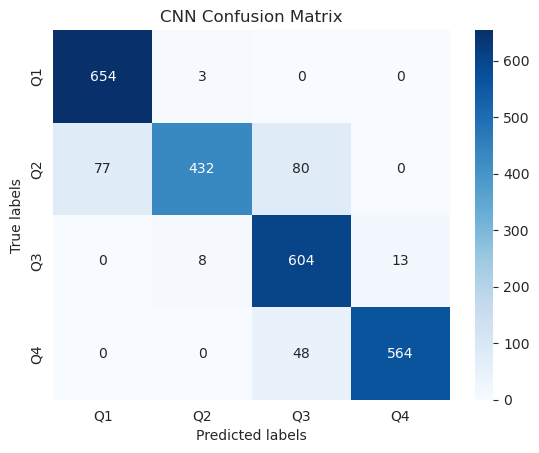

In [19]:
import numpy as np

y_pred = cnn_model.predict(X_test_cnn)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy_cnn_model = accuracy_score(y_test, y_pred_labels)
f1_cnn_model = f1_score(y_test, y_pred_labels, average='weighted')
accuracy_cnn_model, f1_cnn_model
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=(['Q1', 'Q2', 'Q3', 'Q4']), yticklabels=(['Q1', 'Q2', 'Q3', 'Q4']))
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.show()

In [34]:
from sklearn.metrics import classification_report


classification_report_rf = classification_report(y_test, rf_model.predict(X_test), target_names=['Q1', 'Q2', 'Q3', 'Q4'])

classification_report_knn = classification_report(y_test, knn_model.predict(X_test), target_names=['Q1', 'Q2', 'Q3', 'Q4'])

classification_report_gml_boost = classification_report(y_test, gml_boost.predict(X_test), target_names=['Q1', 'Q2', 'Q3', 'Q4'])

classification_report_glmnet = classification_report(y_test, glmnet.predict(X_test), target_names=['Q1', 'Q2', 'Q3', 'Q4'])

classification_report_svm = classification_report(y_test, svm_model.predict(X_test), target_names=['Q1', 'Q2', 'Q3', 'Q4'])

classification_report_dt = classification_report(y_test, dt_model.predict(X_test), target_names=['Q1', 'Q2', 'Q3', 'Q4'])

classification_report_cnn = classification_report(y_test, y_pred_labels, target_names=['Q1', 'Q2', 'Q3', 'Q4'])

classification_reports = {
    "RandomForest": classification_report_rf,
    "KNN": classification_report_knn,
    "GMLBoost": classification_report_gml_boost,
    "GLMNet": classification_report_glmnet,
    "SVM": classification_report_svm,
    "DecisionTree": classification_report_dt,
    "CNN" : classification_report_cnn
}

print(classification_reports["RandomForest"])

for model_name, report in classification_reports.items():
    with open(f'classification_report_{model_name}.txt', 'w') as text_file:
        text_file.write(report)

classification_reports_paths = {
    model_name: f'classification_report_{model_name}.txt'
    for model_name in classification_reports
}

classification_reports_paths

              precision    recall  f1-score   support

          Q1       0.93      0.88      0.91       657
          Q2       0.79      0.81      0.80       589
          Q3       0.80      0.85      0.82       625
          Q4       0.94      0.90      0.92       612

    accuracy                           0.86      2483
   macro avg       0.86      0.86      0.86      2483
weighted avg       0.87      0.86      0.86      2483



{'RandomForest': 'classification_report_RandomForest.txt',
 'KNN': 'classification_report_KNN.txt',
 'GMLBoost': 'classification_report_GMLBoost.txt',
 'GLMNet': 'classification_report_GLMNet.txt',
 'SVM': 'classification_report_SVM.txt',
 'DecisionTree': 'classification_report_DecisionTree.txt',
 'CNN': 'classification_report_CNN.txt'}

78/78 [==============================] - 0s 2ms/step


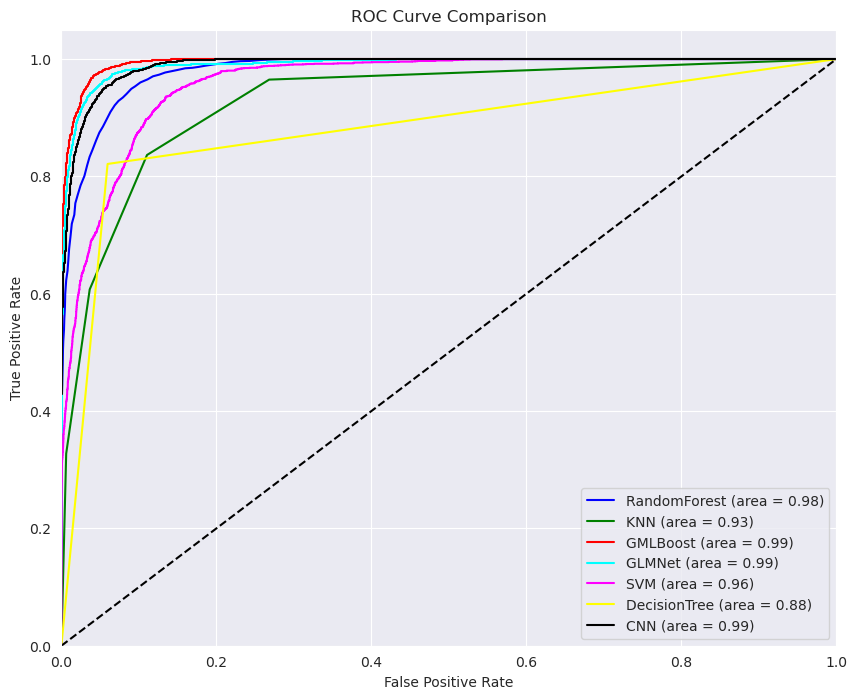

In [24]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from scipy import interp
from numpy import interp
import numpy as np

y_bin = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y_bin.shape[1]

y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Models dictionary (make sure these models are trained before running this code)
models = {
    'RandomForest': rf_model,
    'KNN': knn_model,
    'GMLBoost': gml_boost,
    'GLMNet': glmnet,
    'SVM': svm_model,
    'DecisionTree': dt_model,
    'CNN': cnn_model
}

# Function to compute ROC and AUC
def compute_roc_auc(model, X_test, y_test_bin):
    y_score = model.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    return fpr, tpr, roc_auc

# Dictionary to store ROC and AUC values
model_predictions = {}

# Compute ROC and AUC for each model
for name, model in models.items():
    if name == 'SVM':
        model_predictions[name] = compute_roc_auc(model, X_test, y_test_bin)
    elif name == 'CNN':
        # Handle CNN separately
        y_score = cnn_model.predict(X_test_cnn)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        model_predictions[name] = (fpr, tpr, roc_auc)
    else:
        model_predictions[name] = compute_roc_auc(model, X_test, y_test_bin)

# Plot ROC Curves
plt.figure(figsize=(10, 8))
colors = iter(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightblue', 'lightgreen'])
for name, (fpr, tpr, roc_auc) in model_predictions.items():
    plt.plot(fpr["micro"], tpr["micro"], label=f'{name} (area = {roc_auc["micro"]:.2f})', color=next(colors))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

In [20]:
import pandas as pd

model_performance = {
    "Model": ["RandomForest", "KNN", "GMLBoost", "GLMNet", "SVM", "DecisionTree", "CNN"],
    "Accuracy": [accuracy, accuracy_knn, accuracy_gml_boost, accuracy_glmnet, accuracy_svm_model, accuracy_dt_model, accuracy_cnn_model],
    "F1 Score": [f1, f1_knn, f1_gml_boost, f1_glmnet, f1_svm_model, f1_dt_model, f1_cnn_model]
}

performance_df = pd.DataFrame(model_performance)

print(performance_df)

          Model  Accuracy  F1 Score
0  RandomForest  0.869915  0.870773
1           KNN  0.768425  0.768740
2      GMLBoost  0.929923  0.930381
3        GLMNet  0.917841  0.917909
4           SVM  0.771647  0.776178
5  DecisionTree  0.821184  0.820521
6           CNN  0.907773  0.905850


In [21]:
top_n = 15

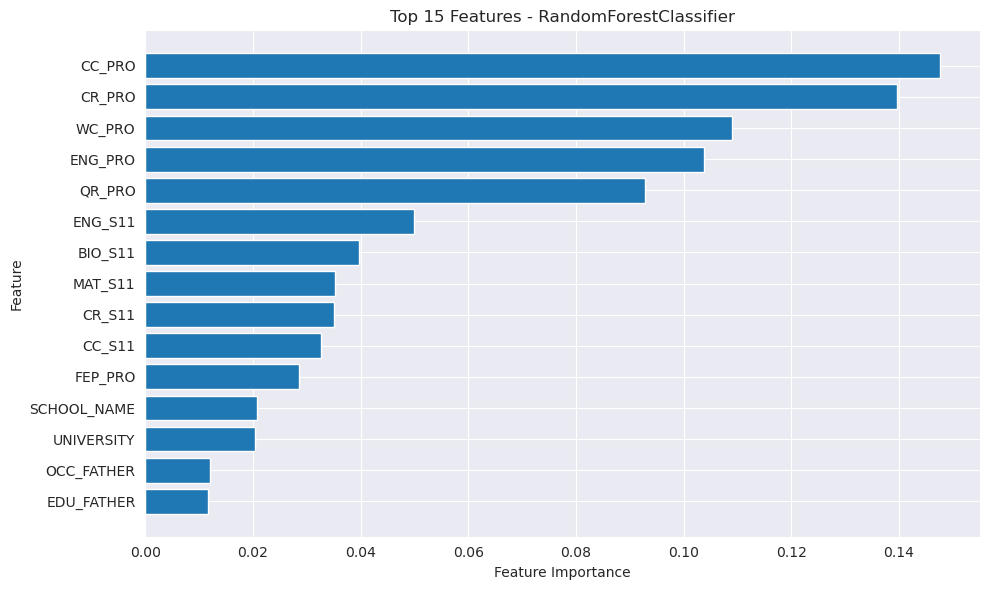

In [22]:
rf_importances = rf_model.feature_importances_
rf_feature_names = X_train.columns
rf_indices = np.argsort(rf_importances)[::-1][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(rf_feature_names[rf_indices], rf_importances[rf_indices])
plt.title(f'Top {top_n} Features - RandomForestClassifier')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

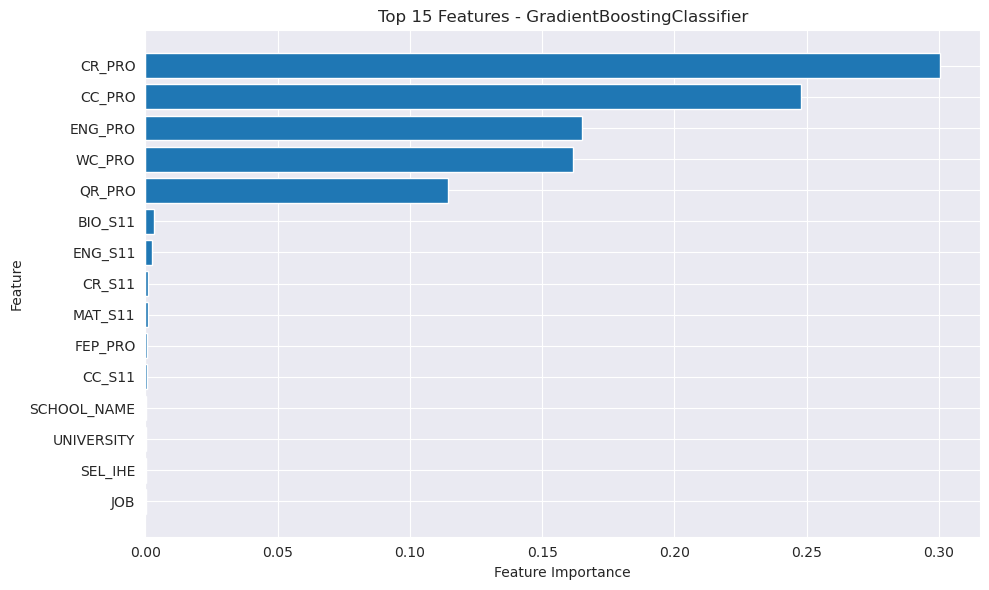

In [23]:
gml_boost_importances = gml_boost.feature_importances_
gml_boost_feature_names = X_train.columns
gml_boost_indices = np.argsort(gml_boost_importances)[::-1][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(gml_boost_feature_names[gml_boost_indices], gml_boost_importances[gml_boost_indices])
plt.title(f'Top {top_n} Features - GradientBoostingClassifier')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

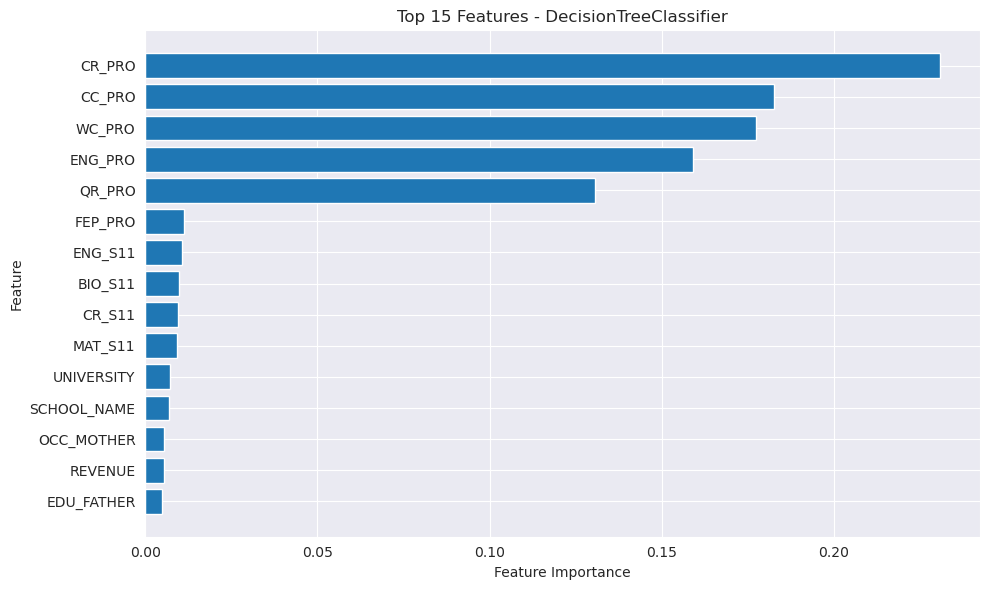

In [24]:
dt_importances = dt_model.feature_importances_
dt_feature_names = X_train.columns
dt_indices = np.argsort(dt_importances)[::-1][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(dt_feature_names[dt_indices], dt_importances[dt_indices])
plt.title(f'Top {top_n} Features - DecisionTreeClassifier')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

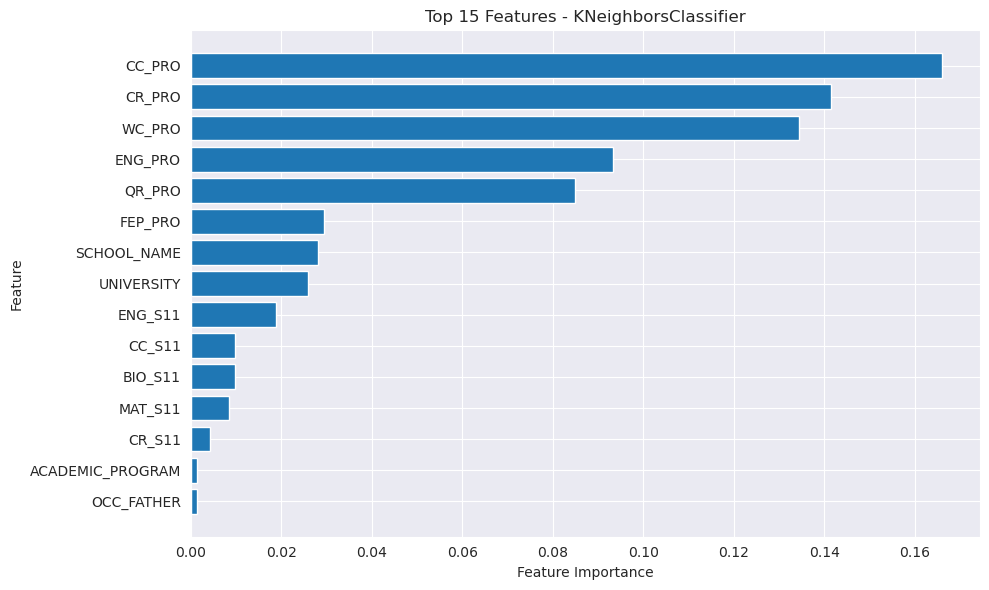

In [25]:
from sklearn.inspection import permutation_importance
knn_importances = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=0)
knn_indices = np.argsort(knn_importances.importances_mean)[::-1][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(rf_feature_names[knn_indices], knn_importances.importances_mean[knn_indices])
plt.title(f'Top {top_n} Features - KNeighborsClassifier')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

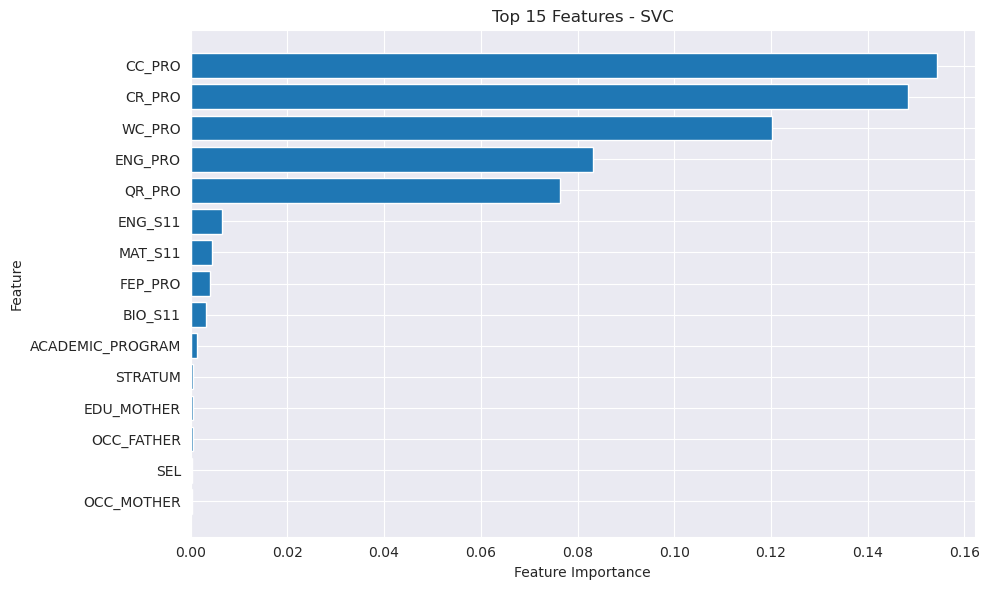

In [26]:
svm_importances = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=0)
svm_indices = np.argsort(svm_importances.importances_mean)[::-1][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(rf_feature_names[svm_indices], svm_importances.importances_mean[svm_indices])
plt.title(f'Top {top_n} Features - SVC')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

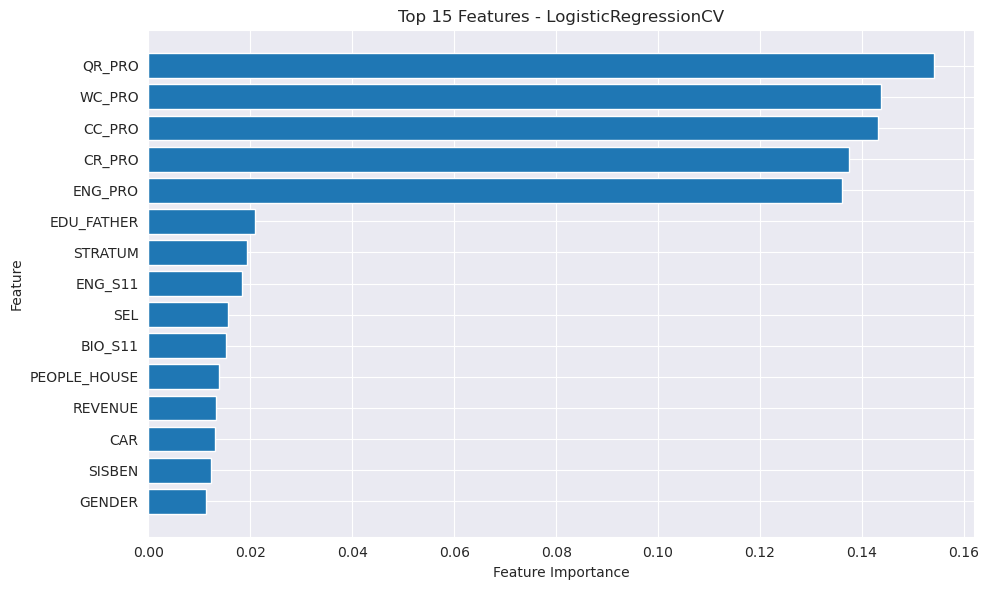

In [27]:
glmnet_importances = abs(glmnet.coef_[0])
glmnet_indices = np.argsort(glmnet_importances)[::-1][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(rf_feature_names[glmnet_indices], glmnet_importances[glmnet_indices])
plt.title(f'Top {top_n} Features - LogisticRegressionCV')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

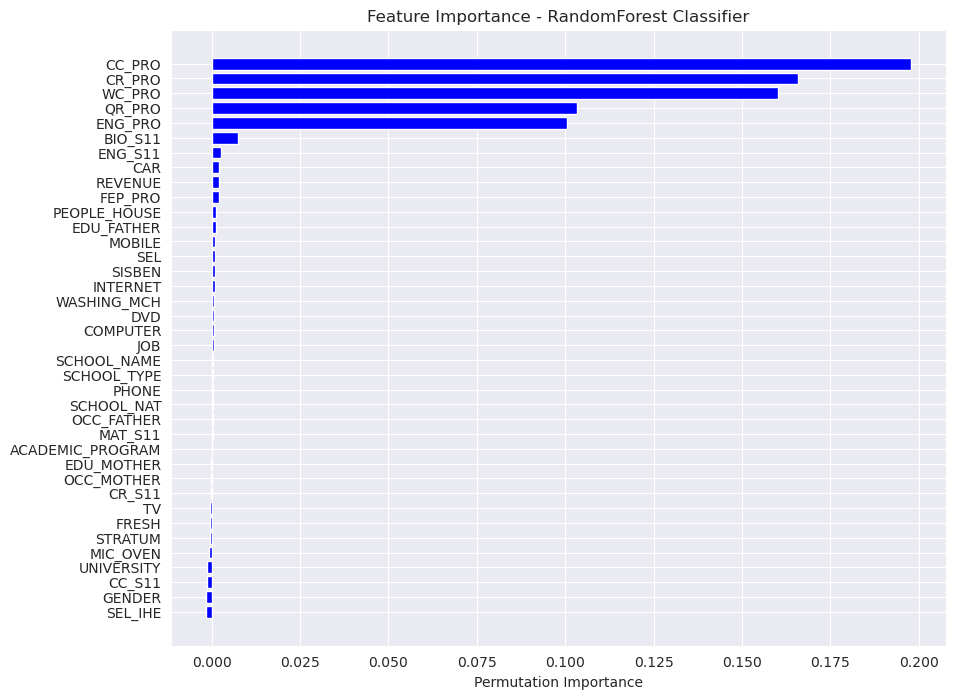

In [28]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=0)

sorted_idx = result.importances_mean.argsort()

importances_sorted = result.importances_mean[sorted_idx]
features_sorted = np.array(X_train.columns)[sorted_idx]

plt.figure(figsize=(10, 8))
plt.barh(range(len(importances_sorted)), importances_sorted, color='blue', align='center')
plt.yticks(range(len(importances_sorted)), features_sorted)
plt.xlabel("Permutation Importance")
plt.title("Feature Importance - RandomForest Classifier")
plt.show()


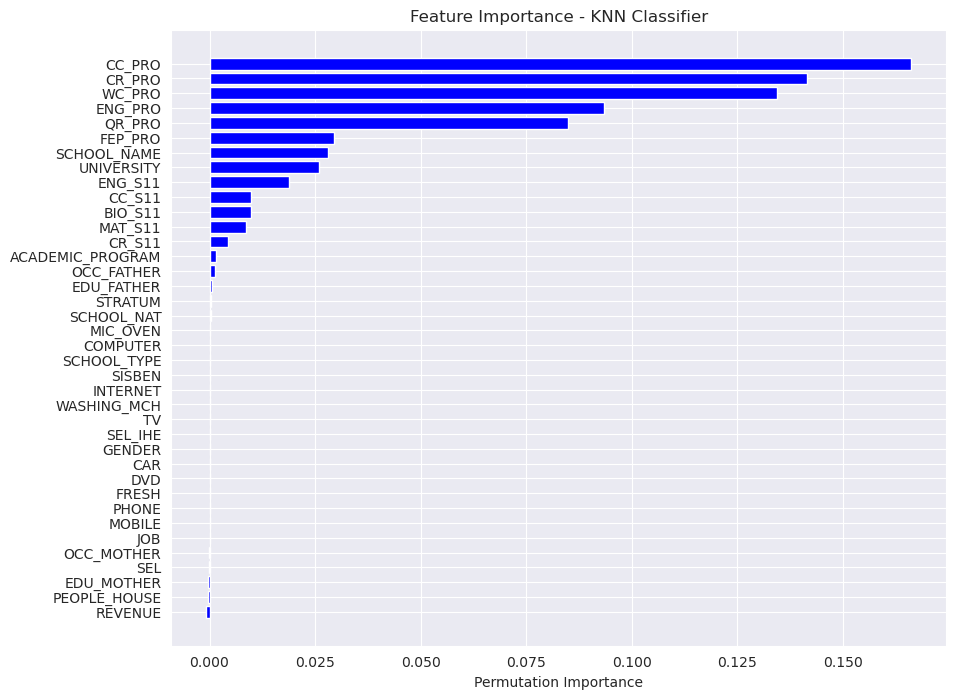

In [29]:
result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=0)

sorted_idx = result.importances_mean.argsort()

importances_sorted = result.importances_mean[sorted_idx]
features_sorted = np.array(X_train.columns)[sorted_idx]

plt.figure(figsize=(10, 8))
plt.barh(range(len(importances_sorted)), importances_sorted, color='blue', align='center')
plt.yticks(range(len(importances_sorted)), features_sorted)
plt.xlabel("Permutation Importance")
plt.title("Feature Importance - KNN Classifier")
plt.show()

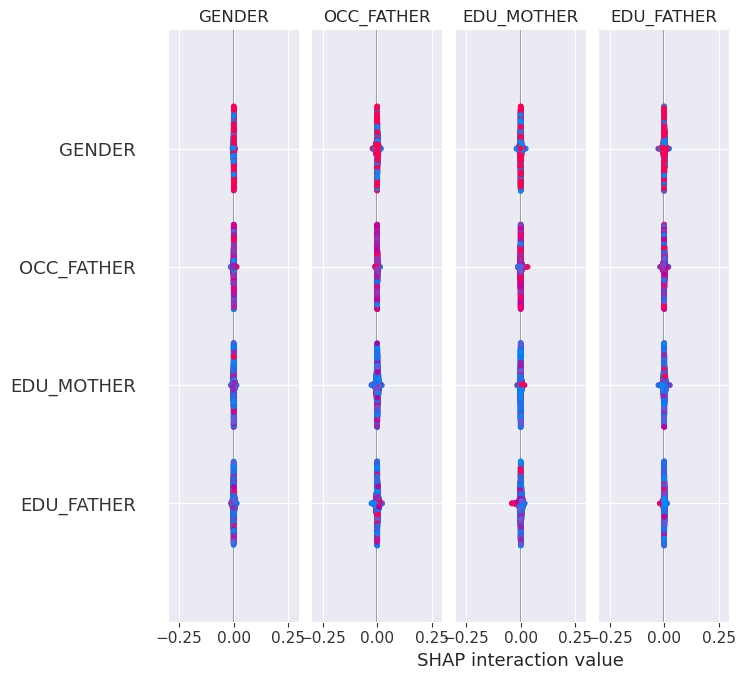

In [30]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_test.columns)

In [47]:
import shap
background = X_train.sample(n=100, random_state=42)

explainer = shap.KernelExplainer(glmnet.predict_proba, background)
shap_values = explainer.shap_values(X_train)

shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_train.iloc[0])

  0%|          | 0/9928 [00:00<?, ?it/s]

KeyboardInterrupt: 

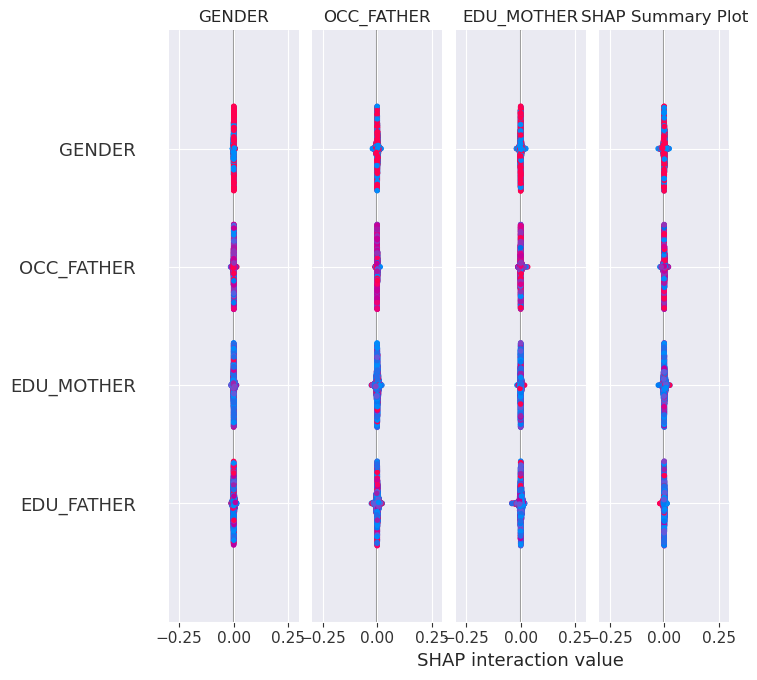

In [34]:
import shap
import numpy as np
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns, class_names=['Q1', 'Q2', 'Q3', 'Q4'], show=False)
plt.title('SHAP Summary Plot')
plt.show()

In [35]:
X_test.shape

(2483, 38)

In [36]:
shap_values.shape

(2483, 38, 4)

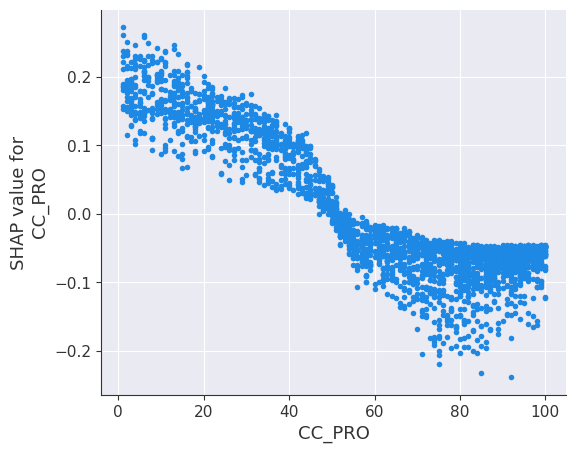

In [37]:
import shap

feature_name = 'CC_PRO'
shap.dependence_plot(feature_name, shap_values[..., 0], X_test, interaction_index=None)

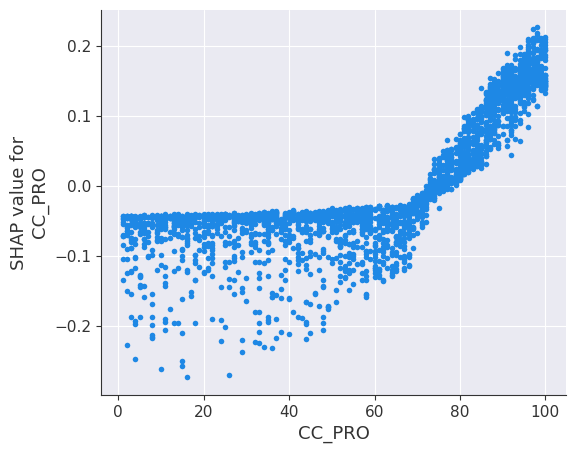

In [38]:
import shap

feature_name = 'CC_PRO'
shap.dependence_plot(feature_name, shap_values[..., 3], X_test, interaction_index=None)

/home/meettilavat/anaconda3/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/home/meettilavat/anaconda3/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/home/meettilavat/anaconda3/lib/python3.11/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame 

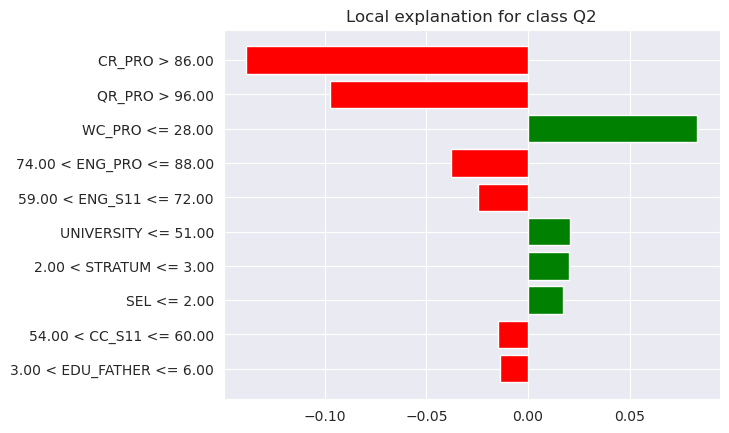

In [42]:
import lime.lime_tabular
import numpy as np

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Q1', 'Q2', 'Q3', 'Q4'],
    mode='classification'
)

instance_index = 7
instance = X_test.iloc[instance_index]

exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=glmnet.predict_proba
)
exp.as_pyplot_figure()
plt.show()

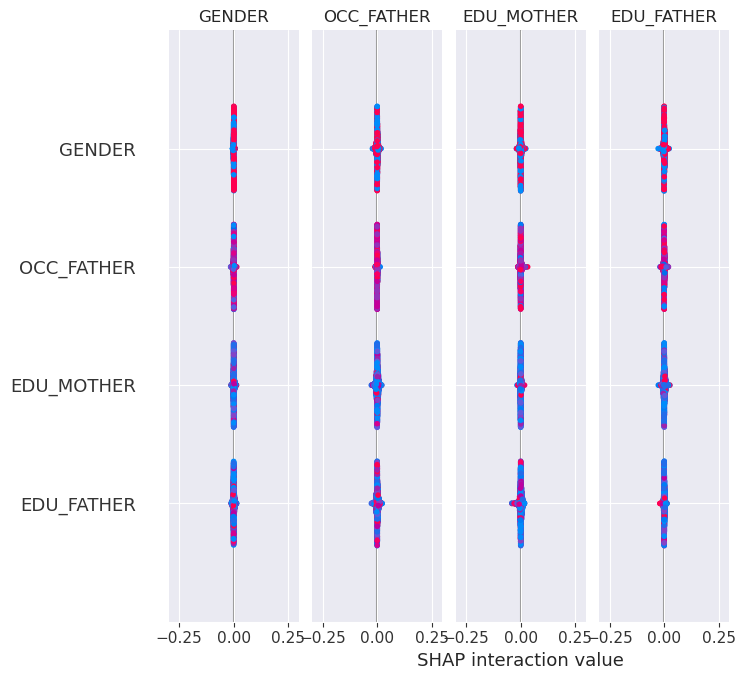

ValueError: Could not find feature named: feature_of_interest

In [41]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_test.columns)

feature_name = 'feature_of_interest'
shap.dependence_plot(feature_name, shap_values[0], X_test, interaction_index=None)

shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)